# Importações e carregamento dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
house = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 12: Problemas do Histograma, Gráficos de Distribuição e Ferramentas de IA/housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house.shape

(20640, 10)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Temos valores nulos na feature total_bedrooms      

In [5]:
house.nunique().sort_values(ascending=False)

median_income         12928
total_rooms            5926
population             3888
median_house_value     3842
total_bedrooms         1923
households             1815
latitude                862
longitude               844
housing_median_age       52
ocean_proximity           5
dtype: int64

# O problema no histograma

No final do dia, para problemas simples o histograma pode funcionar bem, mas para situaçãoes complexas e com base de dados com mais infos, é melhor usar outros tipos de graficos de densidade, como os mostrados abaixo

Vamos gerar varios histogramas e analisalos

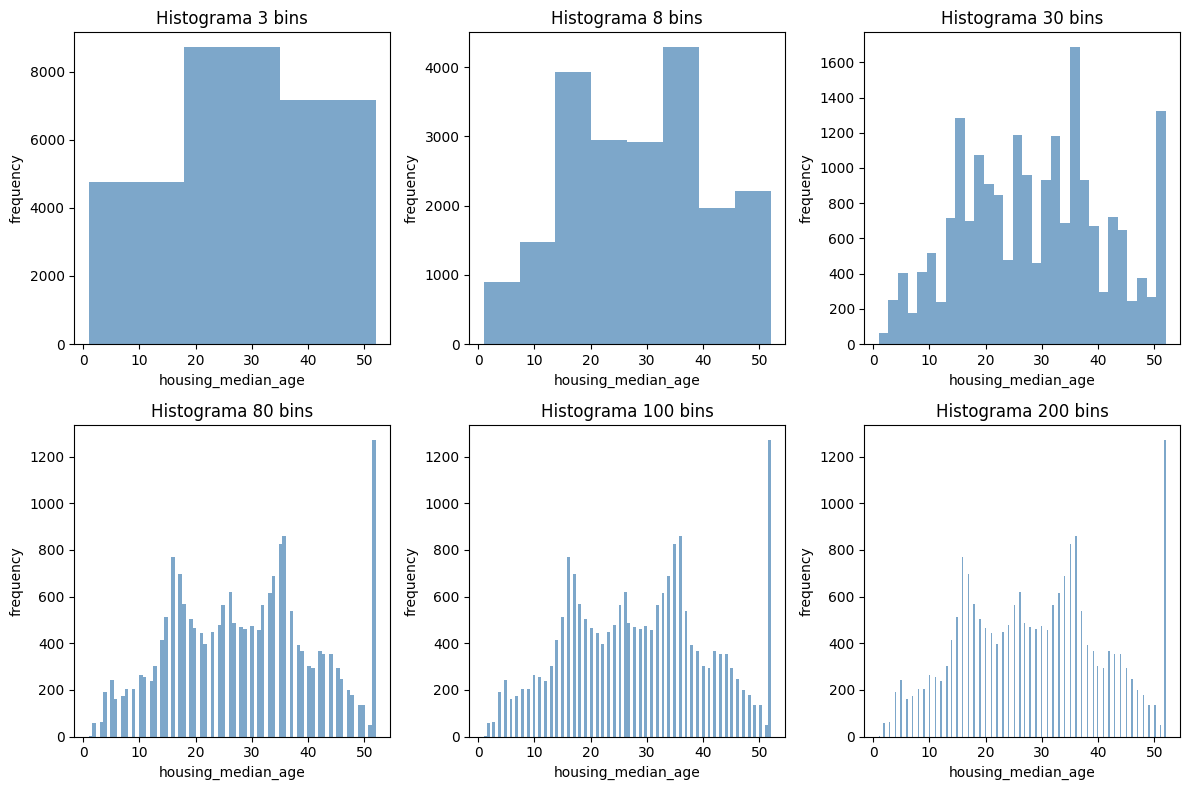

In [6]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

bin_list = [3,8,30,80,100,200]
axes_list = [axes[0,0],axes[0,1],axes[0,2],axes[1,0],axes[1,1],axes[1,2]]
for c in range(6):
  axes_list[c].hist(house['housing_median_age'], bins=bin_list[c], color='steelblue', alpha=0.7)
  axes_list[c].set_title(f'Histograma {bin_list[c]} bins')
  axes_list[c].set_xlabel('housing_median_age')
  axes_list[c].set_ylabel('frequency')

plt.tight_layout()
plt.show()

Quando analisamos a diferença entre a quantidade de bins, fica nitido que quando aumentandos a quantidadee ate certo ponto, conseguimos ver comportamentos dos dados que não estavam visiveis na analise com poucos bins

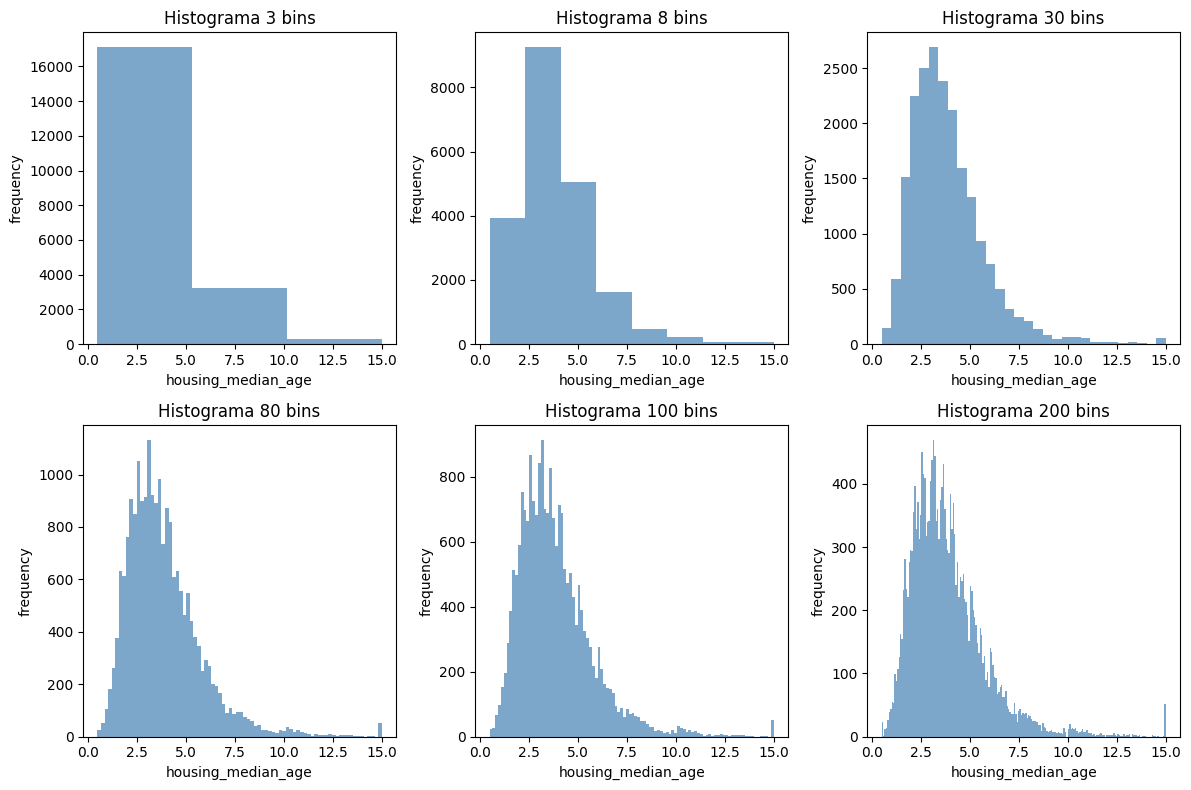

In [7]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

bin_list = [3,8,30,80,100,200]
axes_list = [axes[0,0],axes[0,1],axes[0,2],axes[1,0],axes[1,1],axes[1,2]]
for c in range(6):
  axes_list[c].hist(house['median_income'], bins=bin_list[c], color='steelblue', alpha=0.7)
  axes_list[c].set_title(f'Histograma {bin_list[c]} bins')
  axes_list[c].set_xlabel('housing_median_age')
  axes_list[c].set_ylabel('frequency')

plt.tight_layout()
plt.show()

Esse é o principal problema do histograma, o numero de bins pode mudar completamente a interpretação de um Histograma, uma vez que intervalors diferentes tem concentrações diferentes

Nem mesmo a comparação de distribuições é fácil de se fazer com histograma, mesmo que ele seja ensinado como um gráfico para se olhar distribuições. Veja no exemplo abaixo:

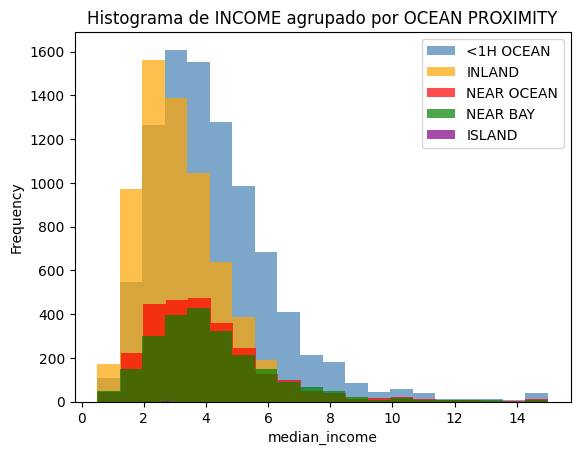

In [9]:
# Vamos visualizar a media de preço separado por categoricas de proximidade ao ocenano

house_lhocean = house[house['ocean_proximity'] == '<1H OCEAN']
house_inland = house[house['ocean_proximity'] == 'INLAND']
house_nearocean = house[house['ocean_proximity'] == 'NEAR OCEAN']
house_nearbay = house[house['ocean_proximity'] == 'NEAR BAY']
house_island= house[house['ocean_proximity'] == 'ISLAND']

# Plotando histogramas para ficarem sobrepostos
plt.hist(house_lhocean.median_income,
         bins=20,
         color ='steelblue',
         alpha=0.7,
         label='<1H OCEAN'
         )
plt.hist(house_inland.median_income,
         bins=20,
         color ='orange',
         alpha=0.7,
         label='INLAND'
         )
plt.hist(house_nearocean.median_income,
         bins=20,
         color ='red',
         alpha=0.7,
         label='NEAR OCEAN'
         )
plt.hist(house_nearbay.median_income,
         bins=20,
         color ='green',
         alpha=0.7,
         label='NEAR BAY'
         )
plt.hist(house_island.median_income,
         bins=20,
         color ='purple',
         alpha=0.7,
         label='ISLAND'
         )

# Rotulos
plt.xlabel('median_income')
plt.ylabel('Frequency')
plt.title('Histograma de INCOME agrupado por OCEAN PROXIMITY')

plt.legend()
plt.show()

Temos uma dificuldade absurda em entender as informações de quem é maior ou menor, quem tem maior (muitas vezes ate ENTENDENDO ERRADO)mediana, etc, em casos parecidos com esses, onde nao fica claro no histograma, fica muito mais facil de ver usando boxplot

<Axes: xlabel='ocean_proximity', ylabel='median_income'>

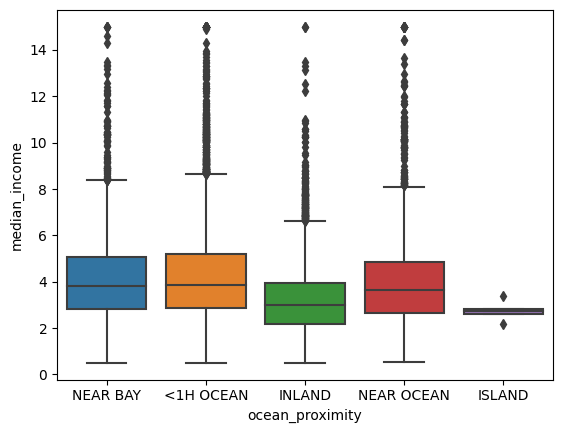

In [11]:
import seaborn as sns

sns.boxplot(x='ocean_proximity', y='median_income', data=house)

Muito mais facil tirar insights desse estilo de grafico

# Outros tipos interessantes de grafico

## Violino

ELe combina algumas partes do boxplot, uma vez que existe um boxplot desenhado nele, e algumas outras partes do histograma, como a distribuição por densidade

<Axes: >

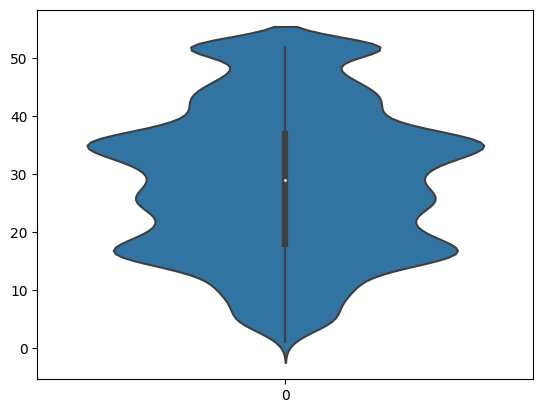

In [12]:
sns.violinplot(house.housing_median_age)

Essa bolinha branca identifica a mediana, o final do preto largo identifica o primeiro quartil e a ponta de cima o terceiro quartil, entao temos as seguintes infos:

- mediana em torno de 28
- Primeiro quartil em torno de 18
- Terceiro quartil em torno de 37

Podemos ver um grafico de violino pra cada categoeria, assim como é feito em boxplot:


<Axes: xlabel='ocean_proximity', ylabel='housing_median_age'>

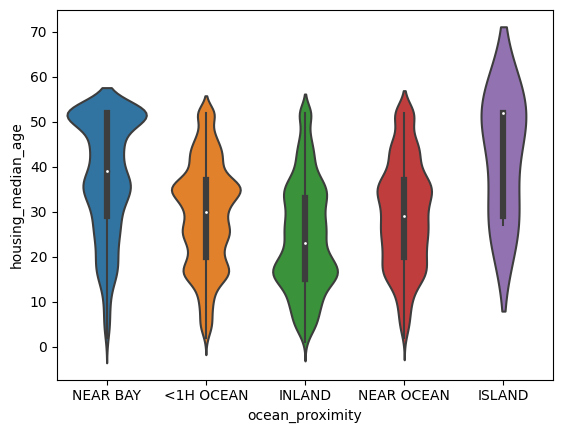

In [15]:
sns.violinplot(
    x=house.ocean_proximity, # Categorica
    y=house.housing_median_age # Numerica
    # Podemos fazer uma separação que vai dividir o violino ao meio e fazer cada metade de uma forma
    #hue='sex' -- cada metade vai ser identificada por um genero
)

## CDP(cumulative distribution plot)

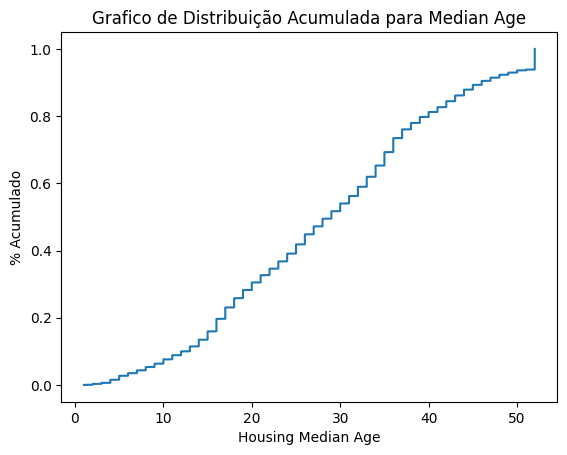

In [20]:
x = np.sort(house.housing_median_age)
y = np.arange(len(house))/ float(len(house))

plt.xlabel('Housing Median Age')
plt.ylabel('% Acumulado')

plt.title('Grafico de Distribuição Acumulada para Median Age')
plt.plot(x,y)

O que esse grafico mostra?
- no eixo X temos os valores para a variável que estamos apresentando no gráfico, no caso, housing median age
- no eixo Y, temos o percentual de observações que possuem no máximo aquele valor, como se fosse um percentil
- este gráfico não sofre de nenhum dos problemas que listamos para o histogram

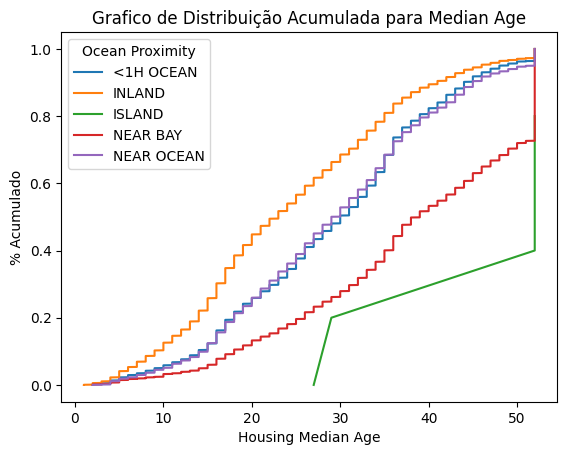

In [28]:
groups = house.groupby('ocean_proximity') # Vai simplemente separar os dados para cada grupo, sem aplicar media, maximo, etc

for name,group in groups:
  x = np.sort(group['housing_median_age'])
  y = np.arange(len(group)) / float(len(group))
  plt.plot(x,y,label=name) # Name é cada grupo utilizado no group by

plt.xlabel('Housing Median Age')
plt.ylabel('% Acumulado')
plt.title('Grafico de Distribuição Acumulada para Median Age')

plt.legend(title='Ocean Proximity')
plt.show()



Podemos perceber nesse grafico de distribuição, que sempre que tivemos um pulo no grafico, quer dizer que tivemos um aumento da densidade com uma pouca variação no valor, ou seja, possivelmente muitos valores estão naquela regiao, podemos ver isso muito bem no grafico verde, onde temos muitos pulos, entao possivelmente grande parte dos dados estao acima de 50 anos, uma vez que ele pulou de 0.3 pra 1


Mesmo grafico para uma amostra normal

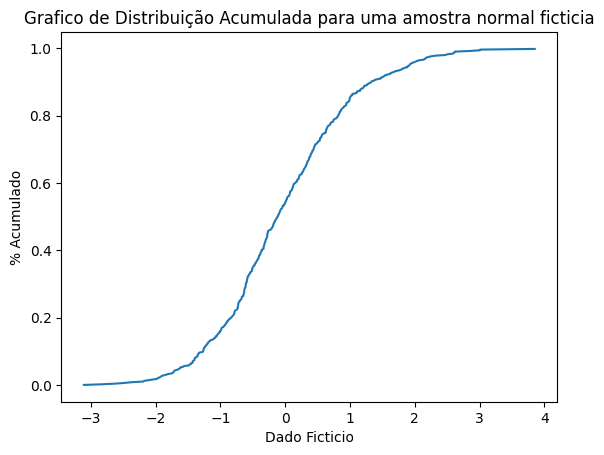

In [29]:
# Parametros da distribuição normal
mean=0
std=1
size = 500 # Tamanho da amostra

# Dados com distribuição normal
data = np.random.normal(mean, std, size)

# Plotando
x = np.sort(data)
y = np.arange(len(data)) / float(len(data))

plt.xlabel('Dado Ficticio')
plt.ylabel('% Acumulado')
plt.title('Grafico de Distribuição Acumulada para uma amostra normal ficticia')

plt.plot(x,y)


O que fizemos nesse grafico é plotar uma distribuição normal, de -3 ate 4, no grafico de distribuição